In [1]:
# Load libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd
# selenium
from selenium.webdriver.common.by import By
import selenium.webdriver as webdriver
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
#sys libraries
from time import sleep
import requests
import random
import csv
import io
import os
import sys
import types
import getpass
import string
import re
from bs4 import BeautifulSoup

# Import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Load library
import matplotlib.patches as mpatches

# nltk and wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows' , 100)

In [35]:
# Create values Selenium
# COMPANY = input("Enter Company ID: ") 
#Uber = 1815218
# IBM = 1009
# facebook = 10667
COMPANY = "10667"

# USERNAME = input("Enter username: ")
USERNAME = 'behdad.k7@gmail.com'

# PASSWORD = input("Enter password: ")
PASSWORD = '1988behrooz10973'
EMPLOYEE = 1000 #int(raw_input("Enter number of results: "))
linkedin = 'https://www.linkedin.com'

# Open Selenium
browser = webdriver.Firefox(executable_path= "geckodriver.exe")

profile = webdriver.FirefoxProfile()
profile.set_preference("browser.cache.disk.enable", False)
profile.set_preference("browser.cache.memory.enable", False)
profile.set_preference("browser.cache.offline.enable", False)
profile.set_preference("network.http.use-cache", False)
profile.update_preferences()

browser.get(linkedin)
sleep(3)

# Find the sign in botthon
sign_in = browser.find_element(by='link text', value='Sign in')
sign_in.click()
sleep(5)

# We find the input section and enter our user information.
email_entry = browser.find_element(by='css selector', value='#username')
password_entry = browser.find_element(by='css selector', value='#password')

# For every letter in our email, we will set a random time between keystrokes
for letter in USERNAME:
    sleep(random.uniform(.1, .4))
    email_entry.send_keys(letter)

# We expect a random time between 0.1 and 0.4 sec for each letter of our password.
for letter in PASSWORD:
    sleep(random.uniform(.1, .4))
    password_entry.send_keys(letter)

# We press enter
password_entry.send_keys(Keys.RETURN)
sleep(10)

search = "https://www.linkedin.com/search/results/people/?facetCurrentCompany=%5B%22" + str(COMPANY) + "%22%5D"

browser.get(search)
sleep(3)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
current_url = 'url_placeholder' # this is a placeholder for the URL check

# Create empty dataframe
df = pd.DataFrame(columns = ['name', 'title', 'location', 'profile'])

# Go through pages and download data
while True:
    # Check to see if url is the 100th page in search
    if current_url.find('page=100') != -1:
        break
    # Check to see if this url has been scraped before; break loop if it has
    previous_url = current_url
    current_url = browser.current_url
    if current_url == previous_url:
        break

    # Start scraping and filling in the dataframe
    page = BeautifulSoup(browser.page_source, 'lxml')
    page_names = page.find_all('span', class_ = 'actor-name')
    page_titles = page.find_all('p', class_ = 'subline-level-1')
    page_locations = page.find_all('p', class_ = 'subline-level-2')
    page_profiles = page.find_all('a', class_ = 'search-result__result-link')

    # Put scraped data into a dataframe
    names = list(map(lambda x: x.text, page_names))
    titles = list(map(lambda x: x.text.replace('\n', ''), page_titles))
    locations = list(map(lambda x: x.text.replace('\n', ''), page_locations))
    profiles = list(map(lambda x: linkedin + x['href'], page_profiles))[::2]
    temp = pd.DataFrame({'name':names, 'title':titles, 'location':locations, 'profile':profiles})

    # Filter out members who do not provide information
    temp = temp[temp['name'] != 'LinkedIn Member']

    # Append new data to df
    df = df.append(temp)

    # Stop appending if the number of retrieved records exceeds the limit
    if df.shape[0] >= EMPLOYEE:
        break

    # Find next button and hit next
    nextt = WebDriverWait(browser, 10).until(
    EC.presence_of_element_located((By.XPATH, "//button[contains(@class,'artdeco-pagination__button artdeco-pagination__button--next artdeco-button artdeco-button--muted artdeco-button--icon-right artdeco-button--1 artdeco-button--tertiary')]")))
    sleep(2)
    nextt.click()
    sleep(2)

# Reset dataframe index
df.reset_index()

# Export results
df.to_csv("output_search.csv", index = False)

# Close Selenium
browser.quit()


KeyboardInterrupt: 

In [36]:
df = pd.read_csv('output_search_IBM.csv',index_col=False)
print(len(df))
df

217


name  \
0                Masoud Javaheri   
1                Mojtaba Esmaili   
2            Majid Zebarjadkamal   
3                            R Y   
4                 Mohammad Abedi   
..                           ...   
212         S. Sakib Hasan, MMAI   
213                 Joe McAndrew   
214                 Graham Wills   
215               Ewing Gillaspy   
216  Livia Dias Armiato Trivinho   

                                                           title  \
0                                                     IT Manager   
1                                             ICT Manager at IBM   
2         کارشناس ارشد مهندسی فناوری اطلاعات- شبکه های کامپیوتری   
3                                                  Intern at IBM   
4                                                       1 at IBM   
..                                                           ...   
212     Software Engineer at IBM | MBA '21 at Queen's University   
213                         Director Product Management at Swrve   
214  Architect for Numeric Intelligence and Predictive Analytics   
215                     Emerging A.I. Talent Management Research   
216                          Senior IT Specialist DB2 DBA at IBM   

                                location  \
0                                   Iran   
1                                   Iran   
2                                   Iran   
3                                   Iran   
4                                   Iran   
..                                   ...   
212                 Toronto, Canada Area   
213                              Ireland   
214                 Greater Chicago Area   
215             Greater Los Angeles Area   
216  Katowice, Silesian District, Poland   

                                                               profile  
0                         https://www.linkedin.com/in/masoud-javaheri/  
1               https://www.linkedin.com/in/mojtaba-esmaili-3b01aa174/  
2            https://www.linkedin.com/in/majid-zebarjadkamal-a324618a/  
3                           https://www.linkedin.com/in/r-y-88ba57198/  
4                https://www.linkedin.com/in/mohammad-abedi-20a433111/  
..                                                                 ...  
212                                https://www.linkedin.com/in/sakibh/  
213                           https://www.linkedin.com/in/joemcandrew/  
214                           https://www.linkedin.com/in/grahamwills/  
215                                https://www.linkedin.com/in/ewingg/  
216  https://www.linkedin.com/in/livia-dias-armiato-trivinho-796aa42a/  

[217 rows x 4 columns]

In [37]:
username = 'behdad.k7@gmail.com'
password = '1988behrooz10973'
profession = 'data scientist'
comapny_name = 'IBM'

file_name = str.strip(profession) + "_" + str(comapny_name) +'.csv'

In [39]:
driver = webdriver.Firefox(executable_path= "geckodriver.exe")

profile = webdriver.FirefoxProfile()
profile.set_preference("browser.cache.disk.enable", False)
profile.set_preference("browser.cache.memory.enable", False)
profile.set_preference("browser.cache.offline.enable", False)
profile.set_preference("network.http.use-cache", False)
profile.update_preferences()

driver.get(url='https://www.linkedin.com/')
sleep(2)

# Find the sign in botthon
sign_in = driver.find_element(by='link text', value='Sign in')
sign_in.click()
sleep(5)

# We find the input section and enter our user information.
email_entry = driver.find_element(by='css selector', value='#username')
password_entry = driver.find_element(by='css selector', value='#password')

# For every letter in our email, we will set a random time between keystrokes
for letter in username:
    sleep(random.uniform(.1, .4))
    email_entry.send_keys(letter)

# We expect a random time between 0.1 and 0.4 sec for each letter of our password.
for letter in password:
    sleep(random.uniform(.1, .4))
    password_entry.send_keys(letter)

# We press enter
password_entry.send_keys(Keys.RETURN)
sleep(10)


source = requests.get(driver.current_url).text
soup = BeautifulSoup(source, 'lxml')

# open the csv file to wirte
writer = csv.writer(open(file_name, 'w', encoding='utf-8'))
#write the headers
writer.writerow(['name', 'job_title', 'current_company', 'university','degree',
                 'location', 'about', 'skills','present_url'])

# Function to identify driver
def driving(x):
    if x.lower().find('data') != -1 or x.lower().find('scien') != -1 or x.lower().find('Data') != -1 or x.lower().find('Scien') != -1 or x.lower().find('machine') != -1  or x.lower().find('analyst') != -1:
        return(1)
    else:
        return(0)

    
# Create driver column
df['driver'] = list(map(driving, df['title']))
#Remove value 0
df = df[df.driver != 0]

p_list = df['profile'].tolist()
print(len(p_list))

i =0
for pro in p_list:
    i=i+1
    try:
        driver.get(pro)
        print('--------------------' , i , '---------------------')
        print('scraping ...' , pro , '\n')
        sleep(3)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(.75)
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
        sleep(2)

        
        page = BeautifulSoup(driver.page_source, 'lxml')
            
        # -------------Scrap here----------------

        ''' 1)Name'''
        try:
            name = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[contains(@class, "inline t-24 t-black t-normal break-words")]')))
            name = name.text
            if name:
                name = name.strip()
        except:
            name = np.nan
                
        print('name: ',name , '\n')
        sleep(0.5)
        
        ''' 2)job_title'''
        try:
            job_title = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//h2[contains(@class, "mt1 t-18 t-black t-normal")]')))
            job_title = job_title.text
            if job_title:
                job_title = job_title.strip()
        except:
            job_title = np.nan
                
        print('job_title: ',job_title , '\n')
        sleep(0.5)
        
        ''' 3)current_company'''
        try:
            current_company = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--experience-list")]/li[1]')))
            current_company = current_company.text
            if current_company:
                current_company = current_company.strip()
        except:
            current_company = np.nan
                
        print('current_company:  ',current_company , '\n')
        sleep(0.5)
    
        ''' 4)university'''
        try:
            university = WebDriverWait(driver, 15).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--experience-list")]/li[2]')))
            if university =='':
                degree = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((
                        By.XPATH,'//section[contains(@class, "pv-profile-section education-section ember-view")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[1]//div[contains(@class,"pv-entity__degree-info")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//h3[contains(@class,"pv-entity__school-name t-16 t-black t-bold")]')))
            
            university = university.text
            if university:
                university = university.strip()
        except:
            university = np.nan
                

        print('university:  ',university , '\n')
        sleep(0.5)
        
        ''' 5)degree'''
        try:
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//section[contains(@class, "pv-profile-section education-section ember-view")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//li[1]//div[contains(@class,"pv-entity__degree-info")]')))
            degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//span[contains(@class,"pv-entity__comma-item")]')))
            degree = degree.text
            
            if degree=='':
                degree = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//p[contains(@class,"pv-entity__degree-name")]')))
                degree = degree.text
                
            if degree:
                degree = degree.strip()
        except:
            degree = np.nan
                
        print('degree:  ',degree , '\n')
        sleep(0.5)
        
        ''' 6)location'''
        try:
            location = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((
                    By.XPATH,'//ul[contains(@class, "pv-top-card--list pv-top-card--list-bullet mt1")]/li[1]')))
            location = location.text
            if location:
                location = location.strip()
        except:
            location = np.nan
        
        print('location:  ',location , '\n')
        sleep(0.5)
        
        ''' 7)about'''
        try:
            about = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((
                    By.XPATH,'//section[contains(@class, "artdeco-container-card pv-profile-section pv-about-section ember-view")]//a[contains(@class,"lt-line-clamp__more")]'))).click()
            about = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((
                    By.XPATH,'//p[contains(@class,"pv-about__summary-text mt4 t-14 ember-view")]')))      
            about = about.text
            if about:
                about = about.strip()
        except:
            about = np.nan
             
        print('about:\n',about , '\n')
        sleep(0.5)
        
        ''' 8)skills'''
        
        try:      
            print("skills search ... ")
            skills = page.find_all('span', class_ = "pv-skill-category-entity__name-text")
            
            #Put scraped data into a ski_df
            arraylen3 = len(page.find_all('span', class_ = "pv-skill-category-entity__name-text"))
        
            profile = pro
            skills = list(map(lambda x: x.text.strip(), skills))[0:arraylen3]
            skills = ','.join(skill for skill in skills)
        except:
            skills = np.nan
                
        print('skills:  ',skills , '\n')
        sleep(0.5)

        writer.writerow([ name, job_title, current_company, university, degree, location, about
                        ,skills, profile])   
        sleep(2)
        
    except:
        pass

print("The process is completed ...\n closing The program!")
driver.quit()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


56
-------------------- 2 ---------------------
scraping ... https://www.linkedin.com/in/vikram-saraswathi-064a835/ 

name:  nan 

job_title:  nan 

current_company:   nan 

university:   nan 

degree:   nan 

location:   nan 

about:
 nan 

skills search ... 
skills:    

-------------------- 3 ---------------------
scraping ... https://www.linkedin.com/in/jazzrandhawa/ 

name:  Jazz 🎸 Randhawa 

job_title:  Data & Analytics Research SMC for Recruitment & Sales Enablement 

current_company:   IBM PartnerWorld - Silver Business Partner 

university:   nan 

degree:   Master of Business Administration - MBA 

location:   Bengaluru, Karnataka, India 

about:
 I am a passionate and creative social media coordinator who supports executive recruitment and sales enablement functions within the data and analytics ecosystem. With 10 years experience in social networking, sales enablement, executive recruitment and digital marketing, I contribute towards corporate goals and objectives. Working 

skills search ... 
skills:    

-------------------- 12 ---------------------
scraping ... https://www.linkedin.com/in/arash-khalili-khameneh/ 

name:  Arash Khalili Khameneh 

job_title:  Database Administrator | Production Control Analyst | Adventurer | Runner 

current_company:   IBM 

university:   UCNA 

degree:   Bachelor of Science (B.Sc.) 

location:   Canada 

about:
 nan 

skills search ... 
skills:    

-------------------- 13 ---------------------
scraping ... https://www.linkedin.com/in/chennakesava-kadapa-55031427/ 

name:  chennakesava kadapa 

job_title:  Data Scientist with Machine Learning, Deep learning and Artificial Intelligence 

current_company:   IBM 

university:   University of Wales 

degree:   Master's degree 

location:   Hyderabad, Telangana, India 

about:
 nan 

skills search ... 
skills:   SAP ERP,SAP BW,SAP 

-------------------- 14 ---------------------
scraping ... https://www.linkedin.com/in/etiennevos/ 

name:  Etienne Vos 

job_title:  Machine Lea

name:  Kamran Pasha 

job_title:  Data Science/ Machine Learning/ Deep Learning 

current_company:   IBM 

university:   Visvesvaraya Technological University 

degree:   B.E 

location:   West Godavari, Andhra Pradesh, India 

about:
 Experienced Data Analyst with a demonstrated history of working in the information technology and services industry. Skilled in Python (Programming Language), Communication, Data Wrangling, Data Science, and Presentation Skills. Strong information technology professional with a B.E focused in Electronics and Communications Engineering from Visvesvaraya Technological University. 

skills search ... 
skills:    

-------------------- 30 ---------------------
scraping ... https://www.linkedin.com/in/palak-jain-b3a99218/ 

name:  Palak Jain 

job_title:  Data Scientist-Cognitive Computing 

current_company:   IBM India Private Limited 

university:   INDIRA GANDHI DELHI TECHNICAL UNIVERSITY FOR WOMEN 

degree:   Master’s Degree 

location:   Gurgaon, Haryana

skills search ... 
skills:    

-------------------- 40 ---------------------
scraping ... https://www.linkedin.com/in/tom-tsuji-700b7110/ 

name:  Tom Tsuji 

job_title:  Data Scientist at IBM 

current_company:   IBM 

university:   The University of Tokyo 

degree:   Master's 

location:   Kawasaki, Kanagawa, Japan 

about:
 Project Management: 11+ years proven operational experience in project and program management with strong planning, organizational, and consistent execution skills while leading many products in a direct management. Ability to drive projects at all type of team and organization by using effective written and verbal communication and facilitation skills. Have plenty experience to build project teams with multinational nationality member in English.

Software Engineering: 16+ years broad based technical expertise through various type of software development. Experienced software project on almost OS system (Solaris, BSD, Linux, Windows, MacOS, WindowsMobile, Symbi

current_company:   IBM 

university:   University of Waterloo 

degree:   Bachelor's Degree 

location:   Canada 

about:
 nan 

skills search ... 
skills:   .NET Framework,Android Development,Python 

-------------------- 46 ---------------------
scraping ... https://www.linkedin.com/in/shashankbk/ 

name:  Shashank BK 

job_title:  CEO at Communiti 

current_company:   Communiti 

university:   Queen's University 

degree:   Master of Business Administration (M.B.A.) 

location:   Toronto, Canada Area 

about:
 I've always been passionate about providing a platform for people to express themselves. I strongly believe that everyone should have an opportunity to make a living by doing what they love. This is the reason we built Communiti - an online marketplace for authentic experiences in your city. We enable hosts to turn their passions into gigs and discover interesting people in their city. I'm currently leading Communiti and we're building a world class team - if you're passionate

## Exploratory Data Analysis (EDA)

In [40]:
# Reading from scv file
df = pd.read_csv('data scientist_IBM.csv',index_col=False)
print("Number of records: " ,df.shape[0])
print("Number of columns: " ,df.shape[1])

Number of records:  51
Number of columns:  9


In [41]:
df

name  \
0                        NaN   
1            Jazz 🎸 Randhawa   
2               Vikash Singh   
3             Namrata Tolani   
4                 ANKIT RAUT   
5             Rushikesh Tade   
6             Muhammad Usman   
7               Subarna Saha   
8              Kumar Saurabh   
9                Chan Naseeb   
10    Arash Khalili Khameneh   
11       chennakesava kadapa   
12               Etienne Vos   
13           Xavier Guérette   
14             Mostafa Fathy   
15               Pitam Ganai   
16      Muhammad Usman Zafar   
17                 Joseph S.   
18                Lokesh Rao   
19               Hazem Ahmed   
20       Alessandra Antolini   
21            Krishna Balaga   
22          Zairah Mustahsan   
23              Kamran Pasha   
24                Palak Jain   
25          Varakantham Rama   
26           Shahrukh Suhail   
27         Kiran Challapalli   
28                 Amr Azzam   
29            Charlie Carson   
30                 Aman Jain   
31           Basant El-sayed   
32               Sneha Rudra   
33                  subbu Ch   
34                 Tom Tsuji   
35              Vinodh Mohan   
36             Kim Razzaboni   
37           Fibish Madathil   
38             Piyush Mittal   
39    Mike (JingHongYu) Bian   
40               Shashank BK   
41                       NaN   
42  Teno González Dos Santos   
43   Madhu Sudhan Prabhakula   
44      Brittany Megan Bogle   
45            Iman Pourvesal   
46               Sandip Shaw   
47            Syed Fawad Ali   
48                 Sarvani B   
49         Yashwanth Konduri   
50               Petar Savov   

                                                                                              job_title  \
0                                                                                                   NaN   
1                                      Data & Analytics Research SMC for Recruitment & Sales Enablement   
2                                                                                        Data Scientist   
3                                                                                 Data Scientist at IBM   
4                                                                                 Data Scientist at IBM   
5                                                                                 Data Scientist at IBM   
6                                                                                 Data Scientist at IBM   
7                                                                               Data Science Enthusiast   
8                                                                          Senior Data Scientist at IBM   
9   IBM Data and AI Elite Team I Applied AI & Data Science Expert | AI Thought Leader | Strategist I...   
10                            Database Administrator | Production Control Analyst | Adventurer | Runner   
11                      Data Scientist with Machine Learning, Deep learning and Artificial Intelligence   
12                                                           Machine Learning Research Scientist at IBM   
13                                                                         Senior Data Scientist at IBM   
14                                                                           Data Engineer at IBM Dubai   
15                              Data Scientist, Python Application Developer, Systems Programmer at IBM   
16                                                                                Data Scientist at IBM   
17                                                                                Data Scientist at IBM   
18                                                             Data Scientist - Artificial Intelligence   
19                                                                             Big Data Engineer at IBM   
20                                                                                  Test Analyst na IBM   
21  A

In [42]:
df.columns

Index(['name', 'job_title', 'current_company', 'university', 'degree',
       'location', 'about', 'skills', 'present_url'],
      dtype='object')

In [43]:
# find number of missing data based on each column
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("\n")

name
False    49
True      2
Name: name, dtype: int64


job_title
False    49
True      2
Name: job_title, dtype: int64


current_company
False    49
True      2
Name: current_company, dtype: int64


university
False    45
True      6
Name: university, dtype: int64


degree
False    48
True      3
Name: degree, dtype: int64


location
False    49
True      2
Name: location, dtype: int64


about
True     26
False    25
Name: about, dtype: int64


skills
True     30
False    21
Name: skills, dtype: int64


present_url
False    51
Name: present_url, dtype: int64




In [45]:
# let see is there anyone from outside UK in our dataset
df['location'].value_counts().to_frame().reset_index()

index  location
0            Bengaluru, Karnataka, India        13
1            Hyderabad, Telangana, India         3
2                                 Canada         3
3               Munich, Bavaria, Germany         2
4                   Toronto, Canada Area         2
5                                  Egypt         2
6             Greater New York City Area         2
7                               Pakistan         1
8                 London, United Kingdom         1
9                Gurgaon, Haryana, India         1
10           Campinas, São Paulo, Brazil         1
11                          Saudi Arabia         1
12       Johannesburg Area, South Africa         1
13  West Godavari, Andhra Pradesh, India         1
14        North West Delhi, Delhi, India         1
15                             Singapore         1
16                               Austria         1
17                 Bengaluru Area, India         1
18                 Montreal, Canada Area         1
19             San Francisco, California         1
20                  United Arab Emirates         1
21              Calgary, Alberta, Canada         1
22                  San Jose, California         1
23                 Nashua, New Hampshire         1
24                         United States         1
25                 Hartford, Connecticut         1
26                San Francisco Bay Area         1
27                 Madrid, Madrid, Spain         1
28             Kawasaki, Kanagawa, Japan         1

#### working on Education

In [46]:
#Creating column to identify degree earned 
education = df[df['degree'].notnull()]
# Function to identify degree
def degree(x):
    if x.lower().find('master') != -1 or x.lower().find('ms') != -1 or x.lower().find('m.s') != -1 or x.lower().find('mba') != -1:
        return('master')
    if x.lower().find('phd') != -1 or x.lower().find('p.hd') != -1 or x.lower().find('ph.d.') != -1 or x.lower().find('ph.d') != -1:
        return('ph.d.')
    if x.lower().find('bachelor') != -1 or x.lower().find('ba') != -1 or x.lower().find('bs') != -1 or x.lower().find('b.a') != -1 or x.lower().find('b.s') != -1:
        return('bachelor')
    else:
        return('Other')

# Create degree column
education['deg'] = list(map(degree, education['degree']))

education


C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


name  \
1            Jazz 🎸 Randhawa   
2               Vikash Singh   
3             Namrata Tolani   
4                 ANKIT RAUT   
5             Rushikesh Tade   
6             Muhammad Usman   
7               Subarna Saha   
8              Kumar Saurabh   
9                Chan Naseeb   
10    Arash Khalili Khameneh   
11       chennakesava kadapa   
12               Etienne Vos   
13           Xavier Guérette   
14             Mostafa Fathy   
15               Pitam Ganai   
16      Muhammad Usman Zafar   
17                 Joseph S.   
18                Lokesh Rao   
19               Hazem Ahmed   
20       Alessandra Antolini   
21            Krishna Balaga   
22          Zairah Mustahsan   
23              Kamran Pasha   
24                Palak Jain   
25          Varakantham Rama   
26           Shahrukh Suhail   
27         Kiran Challapalli   
28                 Amr Azzam   
29            Charlie Carson   
30                 Aman Jain   
31           Basant El-sayed   
32               Sneha Rudra   
33                  subbu Ch   
34                 Tom Tsuji   
35              Vinodh Mohan   
36             Kim Razzaboni   
37           Fibish Madathil   
38             Piyush Mittal   
39    Mike (JingHongYu) Bian   
40               Shashank BK   
42  Teno González Dos Santos   
43   Madhu Sudhan Prabhakula   
44      Brittany Megan Bogle   
45            Iman Pourvesal   
46               Sandip Shaw   
47            Syed Fawad Ali   
48                 Sarvani B   
49         Yashwanth Konduri   

                                                                                              job_title  \
1                                      Data & Analytics Research SMC for Recruitment & Sales Enablement   
2                                                                                        Data Scientist   
3                                                                                 Data Scientist at IBM   
4                                                                                 Data Scientist at IBM   
5                                                                                 Data Scientist at IBM   
6                                                                                 Data Scientist at IBM   
7                                                                               Data Science Enthusiast   
8                                                                          Senior Data Scientist at IBM   
9   IBM Data and AI Elite Team I Applied AI & Data Science Expert | AI Thought Leader | Strategist I...   
10                            Database Administrator | Production Control Analyst | Adventurer | Runner   
11                      Data Scientist with Machine Learning, Deep learning and Artificial Intelligence   
12                                                           Machine Learning Research Scientist at IBM   
13                                                                         Senior Data Scientist at IBM   
14                                                                           Data Engineer at IBM Dubai   
15                              Data Scientist, Python Application Developer, Systems Programmer at IBM   
16                                                                                Data Scientist at IBM   
17                                                                                Data Scientist at IBM   
18                                                             Data Scientist - Artificial Intelligence   
19                                                                             Big Data Engineer at IBM   
20                                                                                  Test Analyst na IBM   
21  A Machine Learning enthusiast with a steady expertise in the fields of Electronics,Embedded,UX D...   
22                                             Data Scientist at Thomas J. Watson Research Center (IB

In [47]:
education['deg'].value_counts(normalize=True) * 100

master      39.583333
Other       29.166667
bachelor    25.000000
ph.d.        6.250000
Name: deg, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


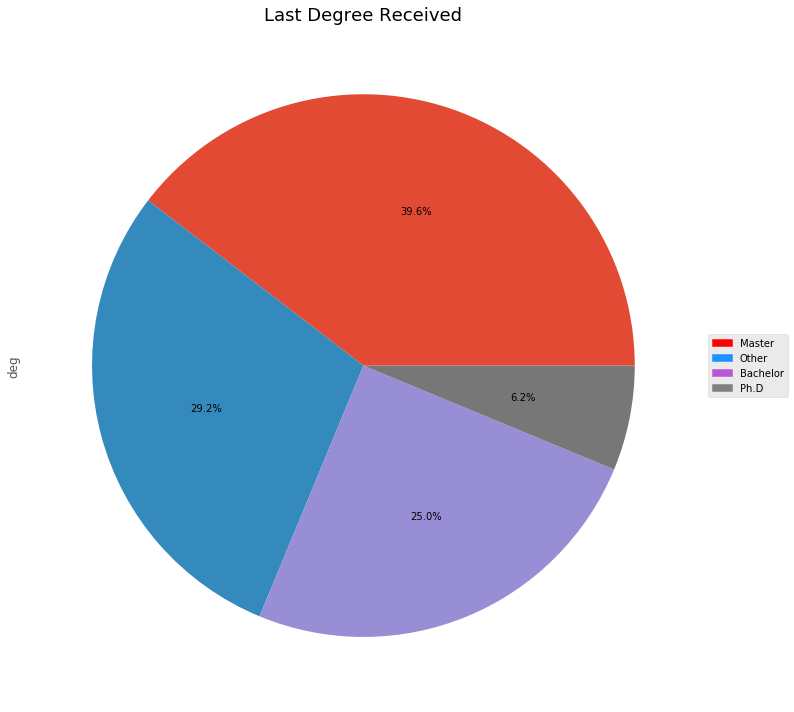

In [48]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))
pie = education['deg'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie.set_title("Last Degree Received", fontsize=18)
Master = mpatches.Patch(color='red', label='Master')
PhD = mpatches.Patch(color='gray', label='Ph.D')
Bachelor = mpatches.Patch(color='mediumorchid', label='Bachelor')
Other = mpatches.Patch(color='dodgerblue', label='Other')
plt.legend(handles=[Master,Other,Bachelor,PhD], loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('pie_degree_IBM.png')

### Best coding language to know

In [49]:
# what skills are in the value?
df['skills'].unique()

array([nan, 'Research,LinkedIn Recruiter,Digital Marketing',
       'Data Science and Machine learning,Natural Language Processing,Machine Learning/AI/Natural Language Processing',
       'Deep Learning,Python,Machine Learning',
       'Data Science,Machine Learning,Big Data Analytics',
       'SAP ERP,SAP BW,SAP', 'R,Data Science,Python',
       'Data Science,Machine Learning,Python',
       'Big Data,python,Apache Airflow', 'C++,Java,MySQL',
       'Data Analysis,Machine Learning,Python',
       'Master Data Management,Extract, Transform, Load (ETL),MDM Data model',
       'Matlab,Programming,Engineering', 'Hadoop,SQL,Python',
       'Learning Management,Blended Learning,E-Learning',
       'Cloud Computing,Virtualization,IT Strategy',
       '.NET Framework,Android Development,Python',
       'Machine Learning,Data Analysis,Big Data',
       'SPSS,Tableau,Statistical Data Analysis',
       'Networking,Windows,Troubleshooting',
       'Big Data,Amazon Web Services (AWS),Amazon S3',
 

In [50]:
df2 = df[df['skills'].notnull()]
skills = ','.join(word for word in df2['skills'])


python = (skills.count('Python')/38)*100
r = (skills.count('R')/38)*100
sql = (skills.count('SQL')/38)*100
cplus= (skills.count('C++')/38)*100
java= (skills.count('Java')/38)*100
c = (skills.count('C')/38)*100

print(python)
print(r)
print(sql)
print(cplus)
print(java)
print(c)


15.789473684210526
10.526315789473683
5.263157894736842
2.631578947368421
2.631578947368421
7.894736842105263


In [51]:
programming_skiils = {'Python' : 26.32 , 'R' : 23.68 , 'C' : 23.68 , 'C++' :10.53 , 'Java' :10.53 ,'sql' : 5.26  }
skill = pd.DataFrame(columns = ['programming_lang' , 'percent'],data =programming_skiils.items())
skill

programming_lang  percent
0           Python    26.32
1                R    23.68
2                C    23.68
3              C++    10.53
4             Java    10.53
5              sql     5.26

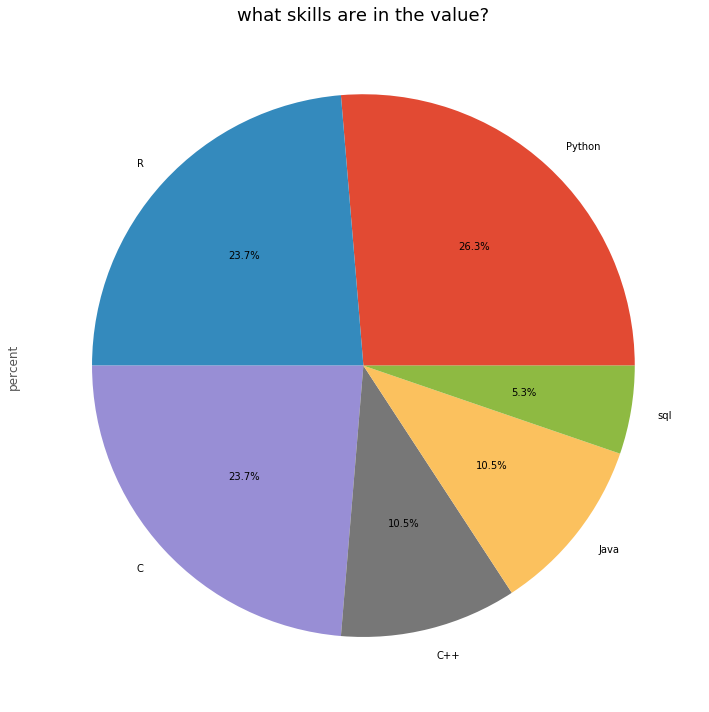

In [52]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))

pie = skill['percent'].plot(kind="pie", autopct='%1.1f%%', labels=skill['programming_lang'])

pie.set_title("what skills are in the value?", fontsize=18)
plt.tight_layout()
plt.savefig('pie_programms_IBM.png')

In [59]:
skill

percent
programming_lang         
Python              26.32
R                   23.68
C                   23.68
C++                 10.53
Java                10.53
sql                  5.26

In [60]:
counts = dict()
for skill in skills.split(','):
    s = skill.lower()
    counts[s] = counts.get(s, 0) + 1

    
counts


{'research': 1,
 'linkedin recruiter': 1,
 'digital marketing': 1,
 'data science and machine learning': 1,
 'natural language processing': 1,
 'machine learning/ai/natural language processing': 1,
 'deep learning': 1,
 'python': 7,
 'machine learning': 5,
 'data science': 4,
 'big data analytics': 1,
 'sap erp': 1,
 'sap bw': 1,
 'sap': 1,
 'r': 1,
 'big data': 3,
 'apache airflow': 1,
 'c++': 1,
 'java': 1,
 'mysql': 1,
 'data analysis': 2,
 'master data management': 1,
 'extract': 1,
 ' transform': 1,
 ' load (etl)': 1,
 'mdm data model': 1,
 'matlab': 1,
 'programming': 1,
 'engineering': 1,
 'hadoop': 1,
 'sql': 1,
 'learning management': 1,
 'blended learning': 1,
 'e-learning': 1,
 'cloud computing': 1,
 'virtualization': 1,
 'it strategy': 1,
 '.net framework': 1,
 'android development': 1,
 'spss': 1,
 'tableau': 1,
 'statistical data analysis': 1,
 'networking': 1,
 'windows': 1,
 'troubleshooting': 1,
 'amazon web services (aws)': 1,
 'amazon s3': 1,
 'statistics': 1,
 'soft

In [61]:
all_skills = pd.DataFrame(columns = ['experties' , 'count'],data =counts.items())
all_skills.sort_values('count',ascending=False,inplace=True,)
all_skills

experties  count
7                                            python      7
8                                  machine learning      5
9                                      data science      4
15                                         big data      3
20                                    data analysis      2
0                                          research      1
29                                           hadoop      1
30                                              sql      1
31                              learning management      1
32                                 blended learning      1
33                                       e-learning      1
34                                  cloud computing      1
35                                   virtualization      1
36                                      it strategy      1
37                                   .net framework      1
39                                             spss      1
38                              android development      1
27                                      programming      1
40                                          tableau      1
41                        statistical data analysis      1
42                                       networking      1
43                                          windows      1
44                                  troubleshooting      1
45                        amazon web services (aws)      1
46                                        amazon s3      1
47                                       statistics      1
28                                      engineering      1
24                                       load (etl)      1
26                                           matlab      1
13                                              sap      1
2                                 digital marketing      1
3                 data science and machine learning      1
4                       natural language processing      1
5   machine learning/ai/natural language processing      1
6                                     deep learning      1
10                               big data analytics      1
11                                          sap erp      1
12                                           sap bw      1
14                                                r      1
25                                   mdm data model      1
16                                   apache airflow      1
17                                              c++      1
18                                             java      1
19                                            mysql      1
21                           master data management      1
22                                          extract      1
23                                        transform      1
1                                linkedin recruiter      1
48                             software development      1

In [62]:
all_skills['percent'] = (all_skills['count']/all_skills['experties'].count()) * 100

all_skills.set_index(["experties"],inplace = True) 
   
# resetting index 
# all_skills.reset_index() 
all_skills

count    percent
experties                                                        
python                                               7  14.285714
machine learning                                     5  10.204082
data science                                         4   8.163265
big data                                             3   6.122449
data analysis                                        2   4.081633
research                                             1   2.040816
hadoop                                               1   2.040816
sql                                                  1   2.040816
learning management                                  1   2.040816
blended learning                                     1   2.040816
e-learning                                           1   2.040816
cloud computing                                      1   2.040816
virtualization                                       1   2.040816
it strategy                                          1   2.040816
.net framework                                       1   2.040816
spss                                                 1   2.040816
android development                                  1   2.040816
programming                                          1   2.040816
tableau                                              1   2.040816
statistical data analysis                            1   2.040816
networking                                           1   2.040816
windows                                              1   2.040816
troubleshooting                                      1   2.040816
amazon web services (aws)                            1   2.040816
amazon s3                                            1   2.040816
statistics                                           1   2.040816
engineering                                          1   2.040816
 load (etl)                                          1   2.040816
matlab                                               1   2.040816
sap                                                  1   2.040816
digital marketing                                    1   2.040816
data science and machine learning                    1   2.040816
natural language processing                          1   2.040816
machine learning/ai/natural language processing      1   2.040816
deep learning                                        1   2.040816
big data analytics                                   1   2.040816
sap erp                                              1   2.040816
sap bw                                               1   2.040816
r                                                    1   2.040816
mdm data model                                       1   2.040816
apache airflow                                       1   2.040816
c++                                                  1   2.040816
java                                                 1   2.040816
mysql                                                1   2.040816
master data management                               1   2.040816
extract                                              1   2.040816
 transform                                           1   2.040816
linkedin recruiter                                   1   2.040816
software development                                 1   2.040816

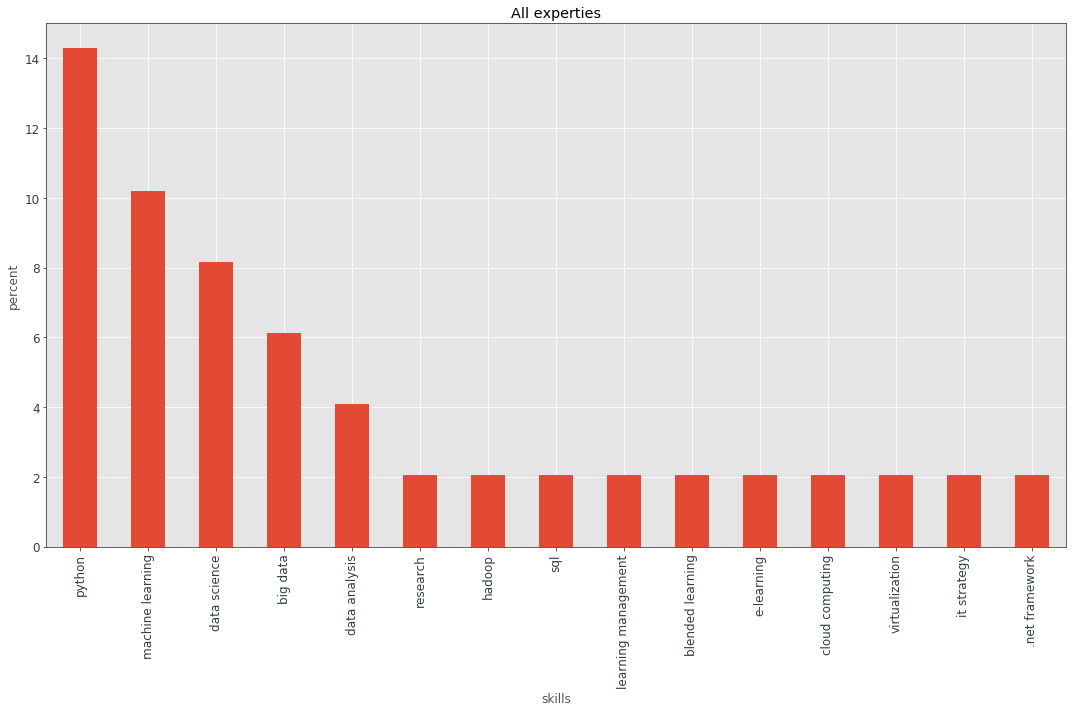

In [63]:
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['text.color'] = 'black'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.figure(figsize=(16,10))

bar = all_skills['percent'].nlargest(15).plot(kind='bar', title ="All experties", figsize=(15, 10), fontsize=12)
bar.set_xlabel("skills", fontsize=12)
bar.set_ylabel("percent", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('Experties_bar_IBM.png')
plt.show()
# plt.savefig('bar_skills.png')

### Job titles at Uber for Data Scienitist field

In [67]:
#Categorize job positions 
df = df[df['job_title'].notnull()]

# Function to identify job titles at Uber
def uberJ(x):
    if x.lower().find('soft') != -1:
        return('Software Engineer')
    if x.lower().find('machine') != -1:
         return('Machine Learning Engineer')
    if x.lower().find('scien') != -1:
         return('Data Scientist')
    if x.lower().find('analy') != -1:
         return('Analyst')
    if x.lower().find('prod') != -1:
         return('Product')
    if x.lower().find('resea') != -1 or x.lower().find('dat') != -1 or x.lower().find('auto') != -1:
         return('Research')
    else:
        return('Other')

    
# Create starting year column
df['Job_cat'] = list(map(uberJ, df['job_title']))
df

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
1            Jazz 🎸 Randhawa   
2               Vikash Singh   
3             Namrata Tolani   
4                 ANKIT RAUT   
5             Rushikesh Tade   
6             Muhammad Usman   
7               Subarna Saha   
8              Kumar Saurabh   
9                Chan Naseeb   
10    Arash Khalili Khameneh   
11       chennakesava kadapa   
12               Etienne Vos   
13           Xavier Guérette   
14             Mostafa Fathy   
15               Pitam Ganai   
16      Muhammad Usman Zafar   
17                 Joseph S.   
18                Lokesh Rao   
19               Hazem Ahmed   
20       Alessandra Antolini   
21            Krishna Balaga   
22          Zairah Mustahsan   
23              Kamran Pasha   
24                Palak Jain   
25          Varakantham Rama   
26           Shahrukh Suhail   
27         Kiran Challapalli   
28                 Amr Azzam   
29            Charlie Carson   
30                 Aman Jain   
31           Basant El-sayed   
32               Sneha Rudra   
33                  subbu Ch   
34                 Tom Tsuji   
35              Vinodh Mohan   
36             Kim Razzaboni   
37           Fibish Madathil   
38             Piyush Mittal   
39    Mike (JingHongYu) Bian   
40               Shashank BK   
42  Teno González Dos Santos   
43   Madhu Sudhan Prabhakula   
44      Brittany Megan Bogle   
45            Iman Pourvesal   
46               Sandip Shaw   
47            Syed Fawad Ali   
48                 Sarvani B   
49         Yashwanth Konduri   
50               Petar Savov   

                                                                                              job_title  \
1                                      Data & Analytics Research SMC for Recruitment & Sales Enablement   
2                                                                                        Data Scientist   
3                                                                                 Data Scientist at IBM   
4                                                                                 Data Scientist at IBM   
5                                                                                 Data Scientist at IBM   
6                                                                                 Data Scientist at IBM   
7                                                                               Data Science Enthusiast   
8                                                                          Senior Data Scientist at IBM   
9   IBM Data and AI Elite Team I Applied AI & Data Science Expert | AI Thought Leader | Strategist I...   
10                            Database Administrator | Production Control Analyst | Adventurer | Runner   
11                      Data Scientist with Machine Learning, Deep learning and Artificial Intelligence   
12                                                           Machine Learning Research Scientist at IBM   
13                                                                         Senior Data Scientist at IBM   
14                                                                           Data Engineer at IBM Dubai   
15                              Data Scientist, Python Application Developer, Systems Programmer at IBM   
16                                                                                Data Scientist at IBM   
17                                                                                Data Scientist at IBM   
18                                                             Data Scientist - Artificial Intelligence   
19                                                                             Big Data Engineer at IBM   
20                                                                                  Test Analyst na IBM   
21  A Machine Learning enthusiast with a steady expertise in the fields of Electronics,Embedded,UX D...   
22                                             Data Scientist at Thom

In [68]:
df['Job_cat'].unique()

array(['Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Research', 'Software Engineer', 'Product', 'Other'], dtype=object)

In [69]:
df['Job_cat'].value_counts(normalize=True) * 100

Data Scientist               53.061224
Machine Learning Engineer    14.285714
Research                     12.244898
Analyst                      10.204082
Software Engineer             6.122449
Other                         2.040816
Product                       2.040816
Name: Job_cat, dtype: float64

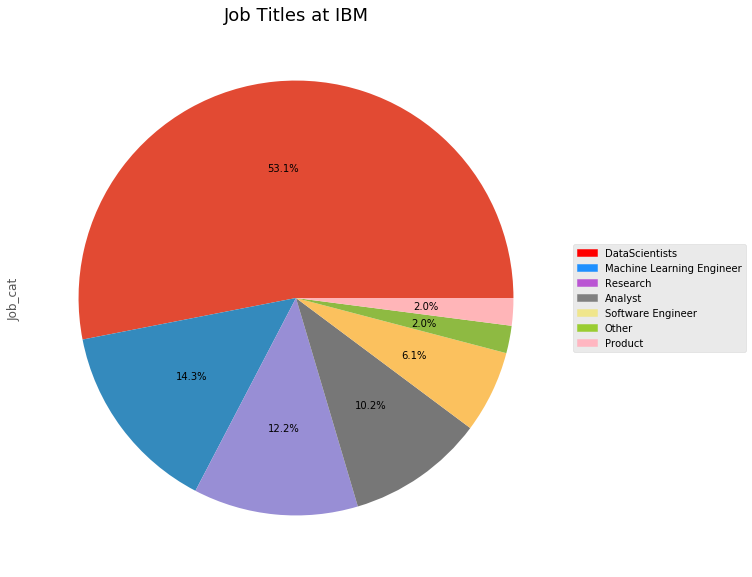

In [74]:
matplotlib.rcParams['text.color'] = 'black'
plt.figure(figsize=(16,10))
pie3 = df['Job_cat'].value_counts().plot(kind="pie", autopct='%1.1f%%', labels=None)

pie3.set_title("Job Titles at IBM", fontsize=18)

DataScientists = mpatches.Patch(color='red', label='DataScientists')
Machine_Learning_Engineer = mpatches.Patch(color='dodgerblue', label='Machine Learning Engineer')
Research  = mpatches.Patch(color='mediumorchid', label='Research')
Analyst = mpatches.Patch(color='gray', label='Analyst')
Software_Engineer =  mpatches.Patch(color='khaki', label='Software Engineer')
Other =  mpatches.Patch(color='yellowgreen', label='Other')
Product =  mpatches.Patch(color='lightpink', label='Product')


plt.legend(handles=[DataScientists,Machine_Learning_Engineer,Research,Analyst,Software_Engineer,Other,Product], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Job_Titles_IBM.png')

### Data Scientist vs. Senior Data Scientist

In [75]:
def DS(x):
    if x.lower().find('senior') != -1 or x.lower().find('sr.') != -1:
        return('Senior')
    if x.lower().find('scientist') != -1:
         return('Scientist')
    else:
        return('Other')
   
# create column for category 

df['DS'] = list(map(DS, df['job_title']))
df

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


name  \
1            Jazz 🎸 Randhawa   
2               Vikash Singh   
3             Namrata Tolani   
4                 ANKIT RAUT   
5             Rushikesh Tade   
6             Muhammad Usman   
7               Subarna Saha   
8              Kumar Saurabh   
9                Chan Naseeb   
10    Arash Khalili Khameneh   
11       chennakesava kadapa   
12               Etienne Vos   
13           Xavier Guérette   
14             Mostafa Fathy   
15               Pitam Ganai   
16      Muhammad Usman Zafar   
17                 Joseph S.   
18                Lokesh Rao   
19               Hazem Ahmed   
20       Alessandra Antolini   
21            Krishna Balaga   
22          Zairah Mustahsan   
23              Kamran Pasha   
24                Palak Jain   
25          Varakantham Rama   
26           Shahrukh Suhail   
27         Kiran Challapalli   
28                 Amr Azzam   
29            Charlie Carson   
30                 Aman Jain   
31           Basant El-sayed   
32               Sneha Rudra   
33                  subbu Ch   
34                 Tom Tsuji   
35              Vinodh Mohan   
36             Kim Razzaboni   
37           Fibish Madathil   
38             Piyush Mittal   
39    Mike (JingHongYu) Bian   
40               Shashank BK   
42  Teno González Dos Santos   
43   Madhu Sudhan Prabhakula   
44      Brittany Megan Bogle   
45            Iman Pourvesal   
46               Sandip Shaw   
47            Syed Fawad Ali   
48                 Sarvani B   
49         Yashwanth Konduri   
50               Petar Savov   

                                                                                              job_title  \
1                                      Data & Analytics Research SMC for Recruitment & Sales Enablement   
2                                                                                        Data Scientist   
3                                                                                 Data Scientist at IBM   
4                                                                                 Data Scientist at IBM   
5                                                                                 Data Scientist at IBM   
6                                                                                 Data Scientist at IBM   
7                                                                               Data Science Enthusiast   
8                                                                          Senior Data Scientist at IBM   
9   IBM Data and AI Elite Team I Applied AI & Data Science Expert | AI Thought Leader | Strategist I...   
10                            Database Administrator | Production Control Analyst | Adventurer | Runner   
11                      Data Scientist with Machine Learning, Deep learning and Artificial Intelligence   
12                                                           Machine Learning Research Scientist at IBM   
13                                                                         Senior Data Scientist at IBM   
14                                                                           Data Engineer at IBM Dubai   
15                              Data Scientist, Python Application Developer, Systems Programmer at IBM   
16                                                                                Data Scientist at IBM   
17                                                                                Data Scientist at IBM   
18                                                             Data Scientist - Artificial Intelligence   
19                                                                             Big Data Engineer at IBM   
20                                                                                  Test Analyst na IBM   
21  A Machine Learning enthusiast with a steady expertise in the fields of Electronics,Embedded,UX D...   
22                                             Data Scientist at Thom

In [76]:
DShighdeg = df[df.DS != 'Other'] 
DShighdeg

name  \
2               Vikash Singh   
3             Namrata Tolani   
4                 ANKIT RAUT   
5             Rushikesh Tade   
6             Muhammad Usman   
8              Kumar Saurabh   
11       chennakesava kadapa   
12               Etienne Vos   
13           Xavier Guérette   
15               Pitam Ganai   
16      Muhammad Usman Zafar   
17                 Joseph S.   
18                Lokesh Rao   
22          Zairah Mustahsan   
24                Palak Jain   
28                 Amr Azzam   
29            Charlie Carson   
30                 Aman Jain   
34                 Tom Tsuji   
39    Mike (JingHongYu) Bian   
42  Teno González Dos Santos   
44      Brittany Megan Bogle   
45            Iman Pourvesal   
46               Sandip Shaw   
47            Syed Fawad Ali   
48                 Sarvani B   
49         Yashwanth Konduri   
50               Petar Savov   

                                                                                      job_title  \
2                                                                                Data Scientist   
3                                                                         Data Scientist at IBM   
4                                                                         Data Scientist at IBM   
5                                                                         Data Scientist at IBM   
6                                                                         Data Scientist at IBM   
8                                                                  Senior Data Scientist at IBM   
11              Data Scientist with Machine Learning, Deep learning and Artificial Intelligence   
12                                                   Machine Learning Research Scientist at IBM   
13                                                                 Senior Data Scientist at IBM   
15                      Data Scientist, Python Application Developer, Systems Programmer at IBM   
16                                                                        Data Scientist at IBM   
17                                                                        Data Scientist at IBM   
18                                                     Data Scientist - Artificial Intelligence   
22                                     Data Scientist at Thomas J. Watson Research Center (IBM)   
24                                                           Data Scientist-Cognitive Computing   
28                                                           Data Scientist / Software Engineer   
29                                                                               Data Scientist   
30                                                           Data Scientist & Big Data Engineer   
34                                                                        Data Scientist at IBM   
39                                Associate Data Scientist and Machine Learning Engineer at IBM   
42                                                             Data Scientist / Engineer at IBM   
44                                   Senior Data Scientist — IBM Data Science and AI Elite Team   
45                                                         Senior Network System Analyst at IBM   
46                                                                           Data Scientist,IBM   
47  Helping companies put AI to work | Senior Data Science Engineer at IBM Data & AI Elite Team   
48                                                                               Data Scientist   
49                                               Data Scientist at IBM Watson Media and Weather   
50                                                                        Data Scientist at IBM   

                 current_company  \
2                      IBM India   
3                            IBM   
4                            IBM   
5                            IBM   
6                            IBM   
8      

In [77]:
DShighdeg['DS'].value_counts(normalize=False)

Scientist    23
Senior        5
Name: DS, dtype: int64

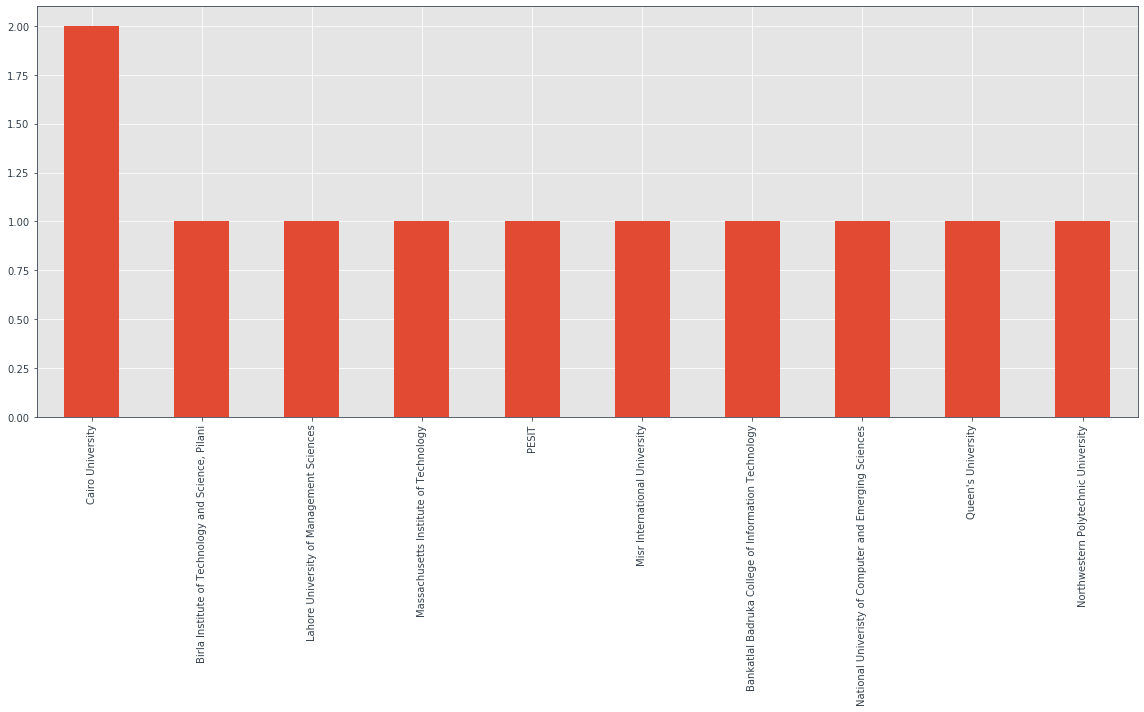

In [78]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
matplotlib.rcParams['text.color'] = 'black'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.figure(figsize=(16,10))
df['university'].value_counts().nlargest(10).plot(kind = 'bar')

bar.set_xlabel("skills", fontsize=12)
bar.set_ylabel("percent", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('University_bar_IBM.png')
plt.show()
# plt.savefig('bar_skills.png')

In [79]:
about_df = df[['about']].copy()
about_df

about
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...
3                                                                                                   NaN
4                                                                                                   NaN
5   I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...
7   • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...
8                                                                                                   NaN
9   Thought Leader in AI, Data Science, Digital Transformation, Cloud, Agile, BlockChain, IoT\r\nAut...
10                                                                                                  NaN
11                                                                                                  NaN
12  A qualified space physicist and currently a machine/deep learning research scientist at IBM Rese...
13                                                                                                  NaN
14  As an ambitious person, I enjoy working in a fast paced, highly motivating company where hard wo...
15                                                                                                  NaN
16                                                                                                  NaN
17                                                                                                  NaN
18  Winner of Eminence and Excellence Cash Award (1300 $) for the practice "Dare to Create Original ...
19                                                                                                  NaN
20  Experience with System Test since October 2007, working for IBM, testing Retail System since mar...
21                                                                                                  NaN
22                                                                                                  NaN
23  Experienced Data Analyst with a demonstrated history of working in the information technology an...
24                                                                                                  NaN
25                                                                                                  NaN
26  Intrigued & passionate about building software solutions that provide meaningful use cases for r...
27  Kiran Challapalli is currently the Lead Technical Architect of Data Science & AI Software for IB...
28                                                                                                  NaN
29  -5 years of working experience in applying data science techniques to solve business problems in...
30  Meticulous and goal-driven Data Scientist and Big Data Engineer with almost 2 years of experienc...
31                                                                                                  NaN
32                                                                                                  NaN
33  A data ecosystem professional with 5+ years of progressive experience in Data Analytics, Statist...
34  Project Management: 11+ years proven operational experience in project and program management wi...
35  • Data enthusiast with keen interest in Data-driven Decision Making, Big Data Analytics and Data...
36  Success is achieved when client and stakeholder expectations are met, and results promote increa...
37  Technology executive focused on business outcome by leading adoption of Cloud platforms, Data & ...
38  Working as a functional Consultant in IBM having knowledge in business process , client interact...
39                                        

In [80]:
about_df.isna().sum()

about    24
dtype: int64

In [81]:
about_df =  about_df[about_df['about'].notna()]

In [82]:
about_df

about
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...
5   I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...
7   • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...
9   Thought Leader in AI, Data Science, Digital Transformation, Cloud, Agile, BlockChain, IoT\r\nAut...
12  A qualified space physicist and currently a machine/deep learning research scientist at IBM Rese...
14  As an ambitious person, I enjoy working in a fast paced, highly motivating company where hard wo...
18  Winner of Eminence and Excellence Cash Award (1300 $) for the practice "Dare to Create Original ...
20  Experience with System Test since October 2007, working for IBM, testing Retail System since mar...
23  Experienced Data Analyst with a demonstrated history of working in the information technology an...
26  Intrigued & passionate about building software solutions that provide meaningful use cases for r...
27  Kiran Challapalli is currently the Lead Technical Architect of Data Science & AI Software for IB...
29  -5 years of working experience in applying data science techniques to solve business problems in...
30  Meticulous and goal-driven Data Scientist and Big Data Engineer with almost 2 years of experienc...
33  A data ecosystem professional with 5+ years of progressive experience in Data Analytics, Statist...
34  Project Management: 11+ years proven operational experience in project and program management wi...
35  • Data enthusiast with keen interest in Data-driven Decision Making, Big Data Analytics and Data...
36  Success is achieved when client and stakeholder expectations are met, and results promote increa...
37  Technology executive focused on business outcome by leading adoption of Cloud platforms, Data & ...
38  Working as a functional Consultant in IBM having knowledge in business process , client interact...
40  I've always been passionate about providing a platform for people to express themselves. I stron...
45  CURRENTLY LOOKING FOR A POSITION IN EDMONTON/CALGARY\r\n\r\nipourvesal@gmail.com - 780-200-3099\...
47  Years of IT development and project management experience, working as Business Intelligence, Dat...
49  The world is full of stories. Every person, organization, government etc. have their unique stor...

In [83]:
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 \n\.]', ' ' , text)
    text = text.replace('\n', ' ')
    return text

about_df['about_punct'] = about_df["about"].apply(lambda x: remove_punct(x))
about_df.head(10)

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


about  \
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5   I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...   
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...   
7   • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...   
9   Thought Leader in AI, Data Science, Digital Transformation, Cloud, Agile, BlockChain, IoT\r\nAut...   
12  A qualified space physicist and currently a machine/deep learning research scientist at IBM Rese...   
14  As an ambitious person, I enjoy working in a fast paced, highly motivating company where hard wo...   
18  Winner of Eminence and Excellence Cash Award (1300 $) for the practice "Dare to Create Original ...   
20  Experience with System Test since October 2007, working for IBM, testing Retail System since mar...   

                                                                                            about_punct  
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...  
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...  
5   I have ablity to create Machine LearningAI and deep learning solutions for real world needs with...  
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics text analytics and ...  
7     Passion to solve realworld business challenges using data analytics    Proficient in deploying...  
9   Thought Leader in AI Data Science Digital Transformation Cloud Agile BlockChain IoT  Author Publ...  
12  A qualified space physicist and currently a machinedeep learning research scientist at IBM Resea...  
14  As an ambitious person I enjoy working in a fast paced highly motivating company where hard work...  
18  Winner of Eminence and Excellence Cash Award   for the practice Dare to Create Original Ideas at...  
20  Experience with System Test since October  working for IBM testing Retail System since march   W...

In [84]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

about_df['about_tokenized'] = about_df['about_punct'] .apply(lambda x: tokenization(x.lower()))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


about  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...   
7  • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...   

                                                                                           about_punct  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine LearningAI and deep learning solutions for real world needs with...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics text analytics and ...   
7    Passion to solve realworld business challenges using data analytics    Proficient in deploying...   

                                                                                       about_tokenized  
1  [i, am, a, passionate, and, creative, social, media, coordinator, who, supports, executive, recr...  
2  [experienced, data, scientist, with, a, demonstrated, history, of, working, in, the, consumer, s...  
5  [i, have, ablity, to, create, machine, learningai, and, deep, learning, solutions, for, real, wo...  
6  [muhammad, usman, is, a, data, scientist, known, for, delivering, predictive, analytics, text, a...  
7  [, passion, to, solve, realworld, business, challenges, using, data, analytics, proficient, in, ...

In [85]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
about_df['about_nonstop'] = about_df['about_tokenized'].apply(lambda x: remove_stopwords(x))
about_df.head(10)

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


about  \
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5   I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...   
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...   
7   • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...   
9   Thought Leader in AI, Data Science, Digital Transformation, Cloud, Agile, BlockChain, IoT\r\nAut...   
12  A qualified space physicist and currently a machine/deep learning research scientist at IBM Rese...   
14  As an ambitious person, I enjoy working in a fast paced, highly motivating company where hard wo...   
18  Winner of Eminence and Excellence Cash Award (1300 $) for the practice "Dare to Create Original ...   
20  Experience with System Test since October 2007, working for IBM, testing Retail System since mar...   

                                                                                            about_punct  \
1   I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2   Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5   I have ablity to create Machine LearningAI and deep learning solutions for real world needs with...   
6   Muhammad Usman is a Data Scientist known for delivering predictive analytics text analytics and ...   
7     Passion to solve realworld business challenges using data analytics    Proficient in deploying...   
9   Thought Leader in AI Data Science Digital Transformation Cloud Agile BlockChain IoT  Author Publ...   
12  A qualified space physicist and currently a machinedeep learning research scientist at IBM Resea...   
14  As an ambitious person I enjoy working in a fast paced highly motivating company where hard work...   
18  Winner of Eminence and Excellence Cash Award   for the practice Dare to Create Original Ideas at...   
20  Experience with System Test since October  working for IBM testing Retail System since march   W...   

                                                                                        about_tokenized  \
1   [i, am, a, passionate, and, creative, social, media, coordinator, who, supports, executive, recr...   
2   [experienced, data, scientist, with, a, demonstrated, history, of, working, in, the, consumer, s...   
5   [i, have, ablity, to, create, machine, learningai, and, deep, learning, solutions, for, real, wo...   
6   [muhammad, usman, is, a, data, scientist, known, for, delivering, predictive, analytics, text, a...   
7   [, passion, to, solve, realworld, business, challenges, using, data, analytics, proficient, in, ...   
9   [thought, leader, in, ai, data, science, digital, transformation, cloud, agile, blockchain, iot,...   
12  [a, qualified, space, physicist, and, currently, a, machinedeep, learning, research, scientist, ...   
14  [as, an, ambitious, person, i, enjoy, working, in, a, fast, paced, highly, motivating, company, ...   
18  [winner, of, eminence, and, excellence, cash, award, for, the, practice, dare, to, create, origi...   
20  [experience, with, system, test, since, october, working, for, ibm, testing, retail, system, sin...   

                                                                                          about_nonstop  
1   [passionate, creative, social, media, coordinator, supports, executive, recruitment, sales, enab...  
2   [experienced, data, scientist, demonstrated, history, working, consumer, services, industry, ski...  
5   [ablity, create, machine, learningai, deep, learning, solutions, real, world, needs, focus, usin...  
6   [muhammad, usman, data, scientist, known, delivering, predictive, analytics, text, analytics, bi...  
7   [, passion, solve, realworld, 

In [86]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

about_df['about_stemmed'] =about_df['about_nonstop'] .apply(lambda x: stemming(x))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


about  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...   
7  • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...   

                                                                                           about_punct  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine LearningAI and deep learning solutions for real world needs with...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics text analytics and ...   
7    Passion to solve realworld business challenges using data analytics    Proficient in deploying...   

                                                                                       about_tokenized  \
1  [i, am, a, passionate, and, creative, social, media, coordinator, who, supports, executive, recr...   
2  [experienced, data, scientist, with, a, demonstrated, history, of, working, in, the, consumer, s...   
5  [i, have, ablity, to, create, machine, learningai, and, deep, learning, solutions, for, real, wo...   
6  [muhammad, usman, is, a, data, scientist, known, for, delivering, predictive, analytics, text, a...   
7  [, passion, to, solve, realworld, business, challenges, using, data, analytics, proficient, in, ...   

                                                                                         about_nonstop  \
1  [passionate, creative, social, media, coordinator, supports, executive, recruitment, sales, enab...   
2  [experienced, data, scientist, demonstrated, history, working, consumer, services, industry, ski...   
5  [ablity, create, machine, learningai, deep, learning, solutions, real, world, needs, focus, usin...   
6  [muhammad, usman, data, scientist, known, delivering, predictive, analytics, text, analytics, bi...   
7  [, passion, solve, realworld, business, challenges, using, data, analytics, proficient, deployin...   

                                                                                         about_stemmed  
1  [passion, creativ, social, media, coordin, support, execut, recruit, sale, enabl, function, with...  
2  [experienc, data, scientist, demonstr, histori, work, consum, servic, industri, skill, natur, la...  
5  [abliti, creat, machin, learningai, deep, learn, solut, real, world, need, focu, use, lead, tech...  
6  [muhammad, usman, data, scientist, known, deliv, predict, analyt, text, analyt, big, data, solut...  
7  [, passion, solv, realworld, busi, challeng, use, data, analyt, profici, deploy, complex, machin...

In [87]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

about_df['about_lemmatized'] = about_df['about_stemmed'].apply(lambda x: lemmatizer(x))
about_df.head()

C:\Users\behdad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


about  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine Learning,AI and deep learning solutions for real world needs wit...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics, text analytics and...   
7  • Passion to solve real-world business challenges using data analytics\r\n• Proficient in deploy...   

                                                                                           about_punct  \
1  I am a passionate and creative social media coordinator who supports executive recruitment and s...   
2  Experienced Data Scientist with a demonstrated history of working in the consumer services indus...   
5  I have ablity to create Machine LearningAI and deep learning solutions for real world needs with...   
6  Muhammad Usman is a Data Scientist known for delivering predictive analytics text analytics and ...   
7    Passion to solve realworld business challenges using data analytics    Proficient in deploying...   

                                                                                       about_tokenized  \
1  [i, am, a, passionate, and, creative, social, media, coordinator, who, supports, executive, recr...   
2  [experienced, data, scientist, with, a, demonstrated, history, of, working, in, the, consumer, s...   
5  [i, have, ablity, to, create, machine, learningai, and, deep, learning, solutions, for, real, wo...   
6  [muhammad, usman, is, a, data, scientist, known, for, delivering, predictive, analytics, text, a...   
7  [, passion, to, solve, realworld, business, challenges, using, data, analytics, proficient, in, ...   

                                                                                         about_nonstop  \
1  [passionate, creative, social, media, coordinator, supports, executive, recruitment, sales, enab...   
2  [experienced, data, scientist, demonstrated, history, working, consumer, services, industry, ski...   
5  [ablity, create, machine, learningai, deep, learning, solutions, real, world, needs, focus, usin...   
6  [muhammad, usman, data, scientist, known, delivering, predictive, analytics, text, analytics, bi...   
7  [, passion, solve, realworld, business, challenges, using, data, analytics, proficient, deployin...   

                                                                                         about_stemmed  \
1  [passion, creativ, social, media, coordin, support, execut, recruit, sale, enabl, function, with...   
2  [experienc, data, scientist, demonstr, histori, work, consum, servic, industri, skill, natur, la...   
5  [abliti, creat, machin, learningai, deep, learn, solut, real, world, need, focu, use, lead, tech...   
6  [muhammad, usman, data, scientist, known, deliv, predict, analyt, text, analyt, big, data, solut...   
7  [, passion, solv, realworld, busi, challeng, use, data, analyt, profici, deploy, complex, machin...   

                                                                                      about_lemmatized  
1  [passion, creativ, social, medium, coordin, support, execut, recruit, sale, enabl, function, wit...  
2  [experienc, data, scientist, demonstr, histori, work, consum, servic, industri, skill, natur, la...  
5  [abliti, creat, machin, learningai, deep, learn, solut, real, world, need, focu, use, lead, tech...  
6  [muhammad, usman, data, scientist, known, deliv, predict, analyt, text, analyt, big, data, solut...  
7  [, passion, solv, realworld, busi, challeng, use, data, analyt, profici, deploy, complex, machin...

In [88]:
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
# nltk.download('punkt')

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(text)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [89]:
words = set(nltk.corpus.words.words())

test_text_data = " ".join(w for w in nltk.wordpunct_tokenize(about_df.about.str.cat()) \
         if w.lower() in words or not w.isalpha())


In [90]:
most_used_words(test_text_data)[:10]

There is 83 different words


[',', 'and', '.', 'in', '-', 'of', 'with', '•', 'to', 'the']

In [91]:
mw = most_used_words(about_df.about.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 86 different words


In [92]:
sorted(most_words)

['#',
 '$',
 '&',
 "'",
 "''",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '+201225601856',
 '+9715298122329Winner',
 ',',
 '-',
 '.',
 '.Experience',
 '.Good',
 '/',
 '//kave.io',
 '10',
 '11+',
 '12',
 '12+',
 '1300',
 '16+',
 '2',
 '20',
 '2000',
 '2005',
 '2006',
 '2006Experienced',
 '2007',
 '2010',
 '2012',
 '2014',
 '2015',
 '3D',
 '5+',
 '6',
 '6+',
 '8',
 '9+',
 ':',
 ';',
 'A',
 'AI',
 'ANOVA.Experience',
 'APIs',
 'AR',
 'AT',
 'Ability',
 'Actively',
 'Advanced',
 'Africa',
 'Agile',
 'Agile/Scrum',
 'Algorithms',
 'Algorithms.Experience',
 'Alteryx',
 'Amazon',
 'Ambassador',
 'America',
 'Ample',
 'An',
 'Analysis',
 'Analyst',
 'Analytical',
 'Analytics',
 'Analyzing',
 'Anamoly',
 'Android',
 'Anti-terrorism',
 'Apache',
 'Application',
 'Architect',
 'Architecture',
 'Artificial',
 'Asia',
 'Augumented',
 'Australia',
 'Author',
 'Auto',
 'Automation',
 'Award',
 'Azure',
 'B.E',
 'B.Tech',
 'BSD',
 'Bachelor',
 'Based',
 'Bayes',
 'Beginner',
 'Bengal',
 'Besides',
 'B

In [93]:
# I'm defining this function to use it in the 
# Data Preparation Phase
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

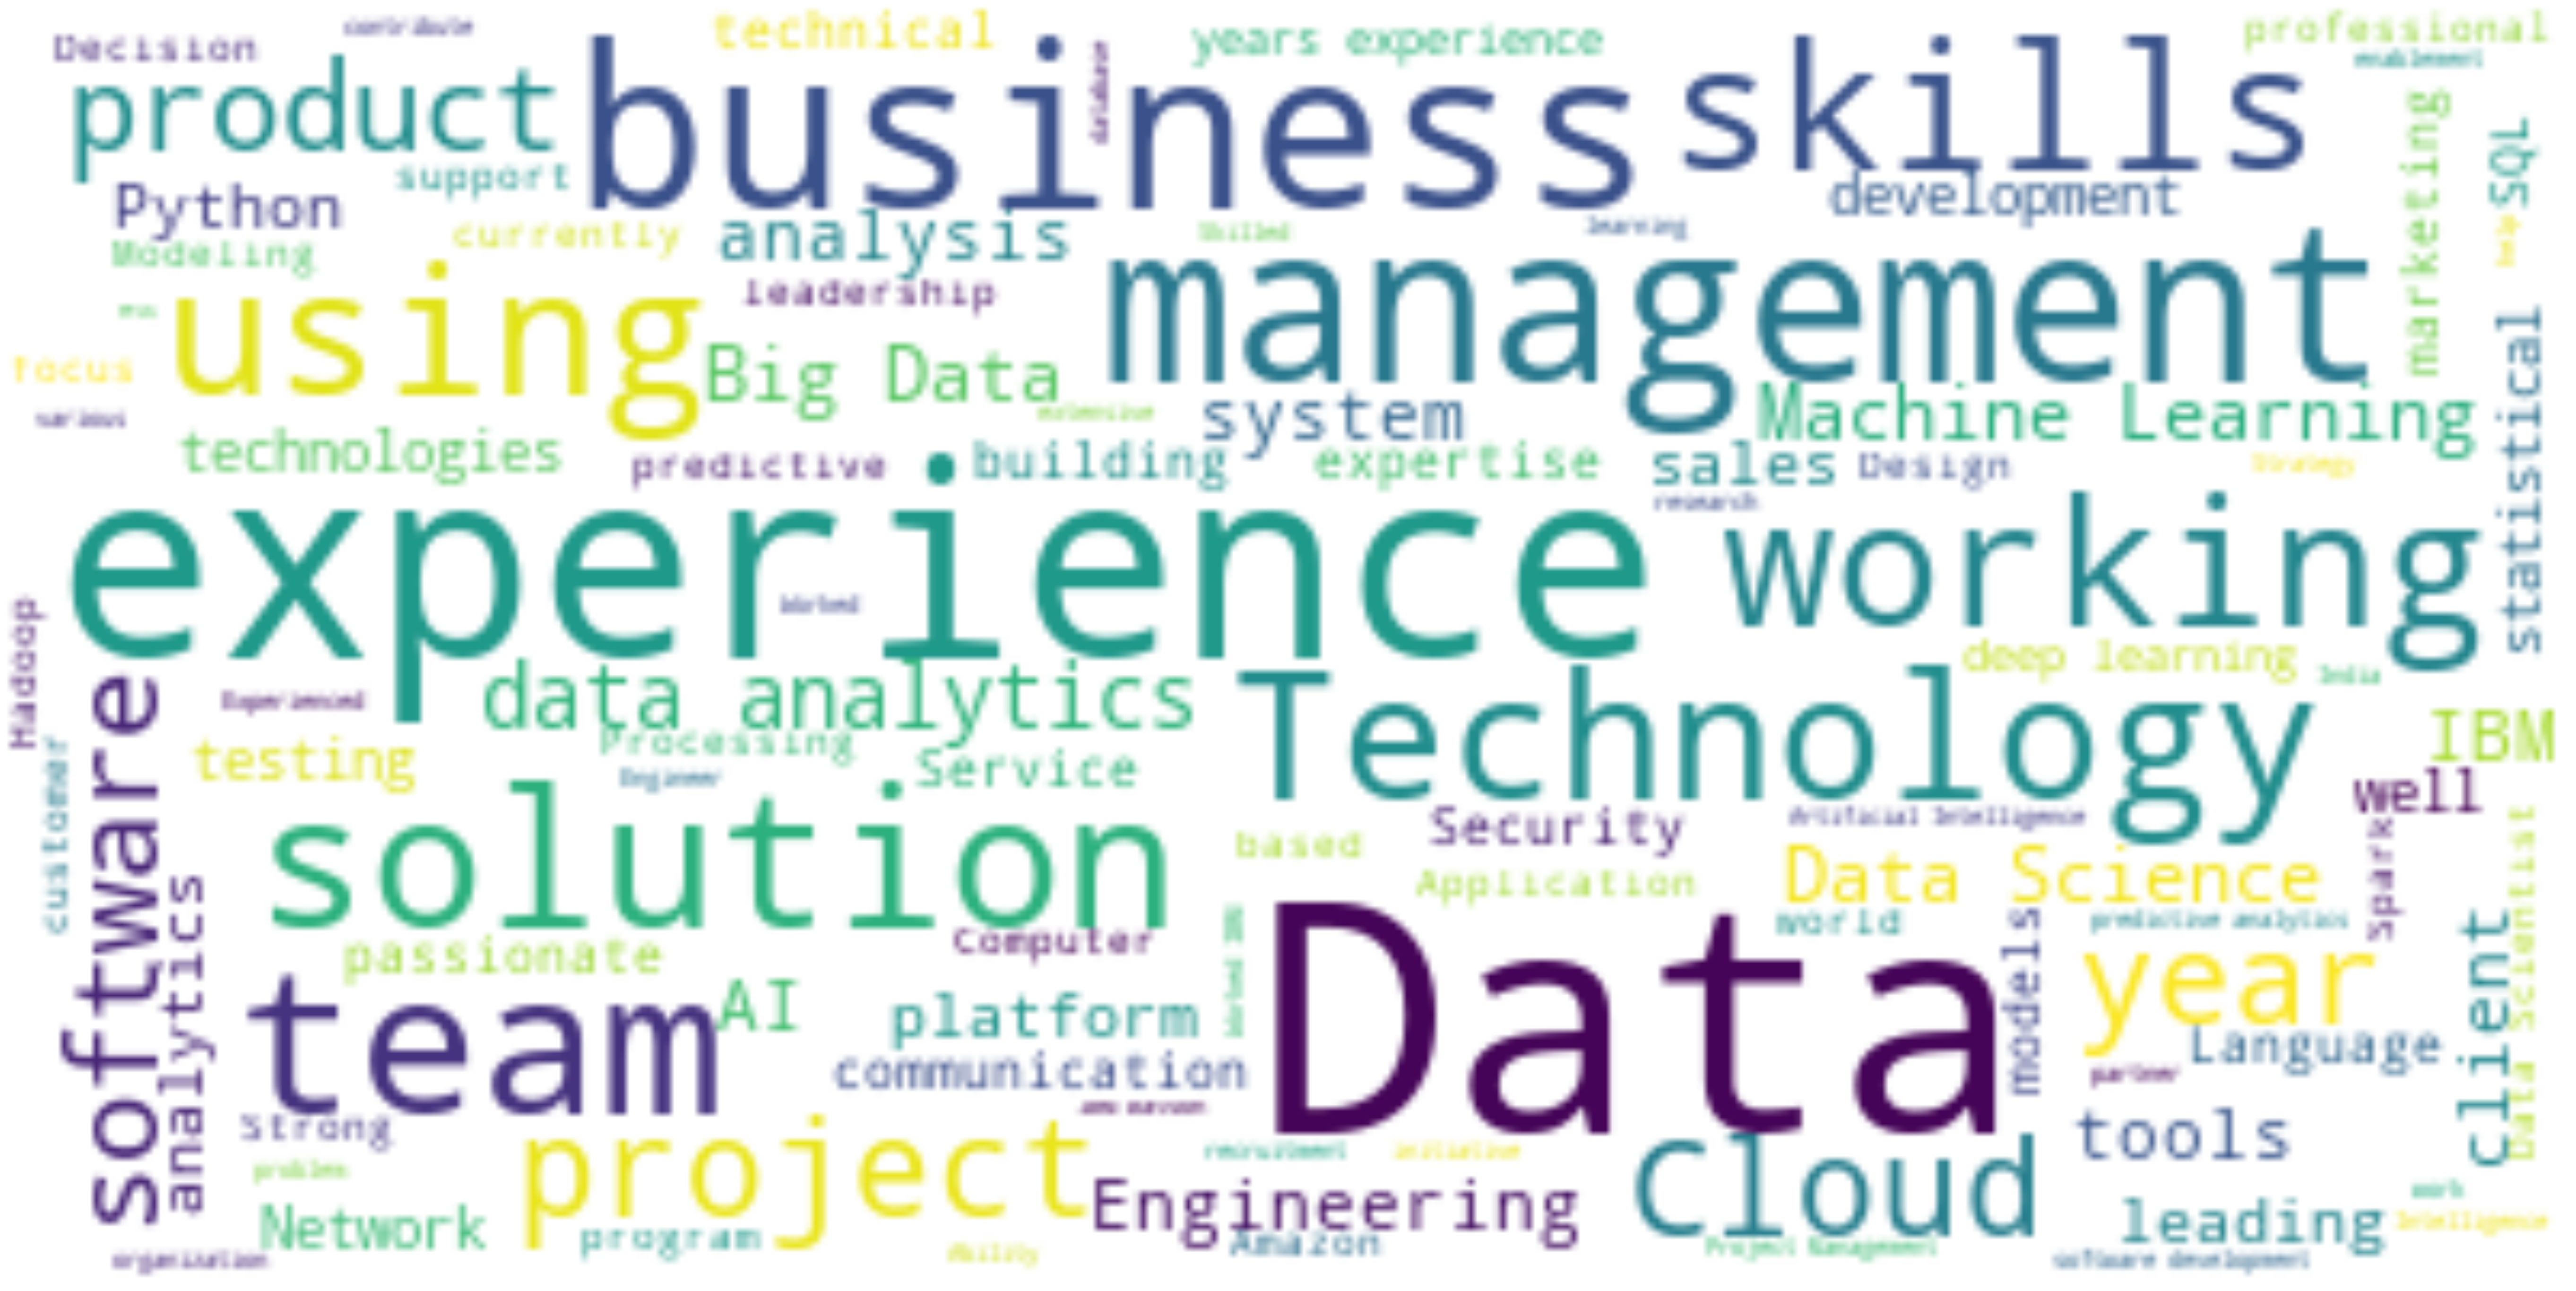

In [94]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = " ".join(about for about in about_df.about_punct)
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords = set(STOPWORDS)
# stopwords.add(search_modifier)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords= stopwords ,  background_color="white").generate(text)
wordcloud.to_file('wordcloud_IBM.png')
plt.figure(figsize=(100,50))
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Frequency Analysis

In [95]:
#download nltk attribute if needed
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [96]:
text = ' '.join(description for description in about_df.about_punct)

In [97]:
text

'I am a passionate and creative social media coordinator who supports executive recruitment and sales enablement functions within the data and analytics ecosystem With  years experience in social networking sales enablement executive recruitment and digital marketing I contribute towards corporate goals and objectives Working with cross functional teams in hiring and marketing initiatives    CURRENT ROLE      Dual reporting to Chief Human Resource Officer and Chief Marketing Officer    Providing HR support with marketing the job openings and connecting with right candidates for recruitment screening    Providing Marketing support with connecting data and analytics leaders to our sales leaders in sales enablement initiatives    Helping Presales team to get access of RFI RFP RFQ etc with global enterprises  vendor management office Experienced Data Scientist with a demonstrated history of working in the consumer services industry Skilled in Natural Language Processing NLP Information Ret

In [98]:
# tokenization
filtered_text = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

In [99]:
from nltk.corpus import stopwords
# stopwords
filtered_text = [word for word in filtered_text if word not in stopwords.words('english')]

In [100]:
# punctuation
filtered_text = [''.join(c for c in s if c not in string.punctuation) for s in filtered_text]
filtered_text = [s for s in filtered_text if s]

In [101]:
# lowercase
filtered_text = [word.lower() for word in filtered_text]

In [102]:
# Word Stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
filtered_text_stem = [stemmer.stem(t) for t in filtered_text]

In [103]:
# Lemmatization
lemmatizer = nltk.WordNetLemmatizer()

filtered_text_lem = [lemmatizer.lemmatize(t) for t in filtered_text]

In [104]:
# NLTK Frequency Distributions
#nltkText = [filtered_text_stem, filtered_text_lem]

fdist = nltk.FreqDist(filtered_text_lem)

fdistDF = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdistDF = fdistDF.rename(columns={'index':'word', 0:'count'})
fdistDF = fdistDF.sort_values(by='count', ascending=False)
print('-----------------head words-----------------')
print(fdistDF.head(10).reset_index(drop=True))
print('-----------------tail words-----------------')
print(fdistDF.tail(10).reset_index(drop=True))

-----------------head words-----------------
         word  count
0        data     89
1  experience     41
2  management     27
3           i     26
4   analytics     26
5    learning     24
6    business     23
7  technology     23
8         ibm     21
9     project     20
-----------------tail words-----------------
           word  count
0  visvesvaraya      1
1           pay      1
2          roll      1
3         plsql      1
4       routine      1
5       funcamp      1
6      november      1
7     wrangling      1
8            be      1
9    facilitate      1
